# Kaggle: Telco Customer Churn Analysis 

In [6]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [7]:
os.chdir('C:\\Users\\User\\ADS_REV_code-main\\ADS-Assignment-4')

In [8]:
#Calling in the Data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Preparing the Data 
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Since total charges object, we convert total charges to float
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


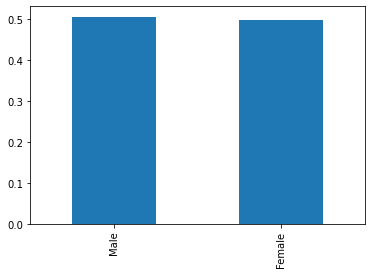

In [14]:
#Demographics have proven to be the most popular with the telco brand.gender.value_counts(normalize=True).plot(kind='bar');

data.gender.value_counts()
data.gender.value_counts(normalize=True).plot(kind='bar');


Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


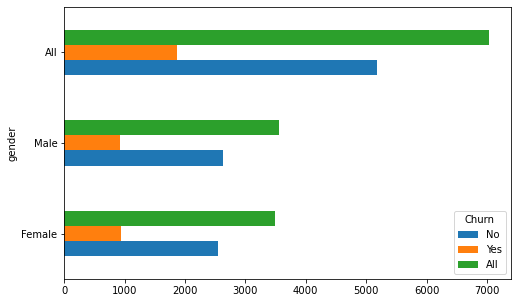

In [15]:
print(pd.crosstab(data.gender,data.Churn,margins=True))
pd.crosstab(data.gender,data.Churn,margins=True).plot(kind='barh',figsize=(8,5));

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


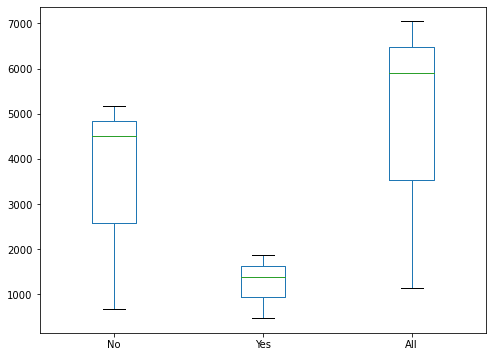

In [16]:
print(pd.crosstab(data.SeniorCitizen,data.Churn,margins=True))
pd.crosstab(data.SeniorCitizen,data.Churn,margins=True).plot(kind='box',figsize=(8,6));

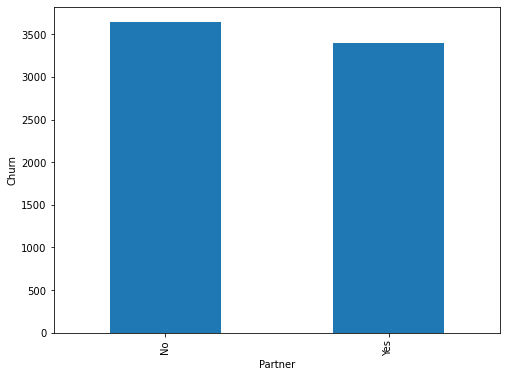

In [17]:
partner_Churn=data.groupby(['Partner'])['Churn'].count().plot(kind='bar', xlabel='Partner', ylabel='Churn',figsize=(8,6));

The customer who doesn’t have a partner will be more likely to churn for the Telco service.

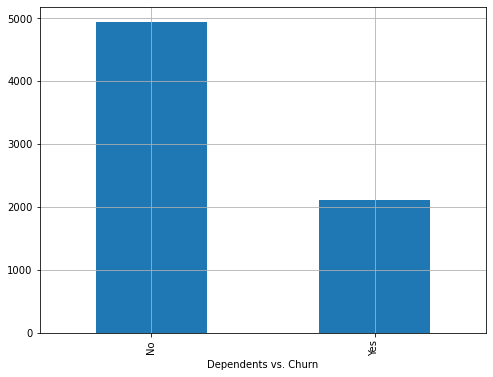

In [18]:
dependent_Churn=data.groupby(['Dependents'])['Churn'].count().plot(kind='bar',xlabel='Dependents vs. Churn', legend=None, grid=True,figsize=(8,6));

The customer who doesn’t have Dependents will be more likely to churn for the Telco service.

In [19]:
Internet_Churn =pd.crosstab(data.InternetService,data.Churn,margins=True)
Internet_Churn

Churn,No,Yes,All
InternetService,,,
DSL,1962,459,2421
Fiber optic,1799,1297,3096
No,1413,113,1526
All,5174,1869,7043


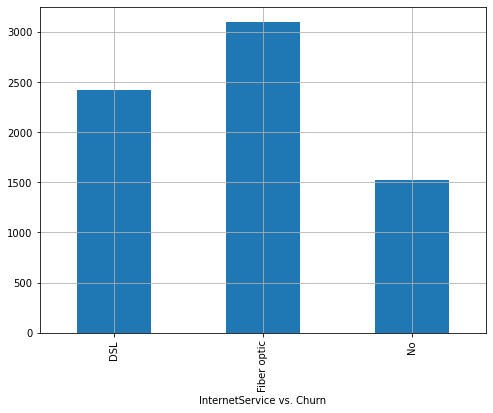

In [20]:
Internet_Churn=data.groupby(['InternetService'])['Churn'].count().plot(kind='bar',xlabel='InternetService vs. Churn', legend=None, grid=True,figsize=(8,6));

The results shows that most people are using Fiber internet and the customers who subscribe to Fiber internet are more likely to Churn.

Churn                  No   Yes   All
StreamingTV                          
No                   1868   942  2810
No internet service  1413   113  1526
Yes                  1893   814  2707
All                  5174  1869  7043


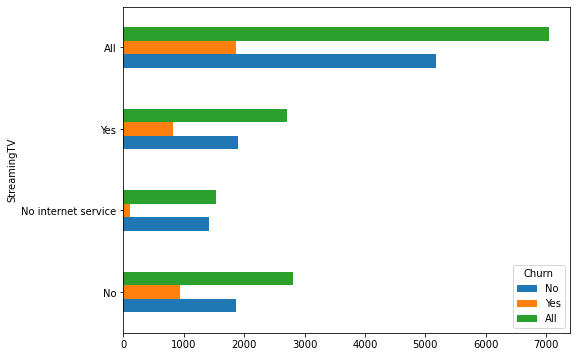

In [21]:
print(pd.crosstab(data.StreamingTV,data.Churn,margins=True))
pd.crosstab(data.StreamingTV,data.Churn,margins=True).plot(kind='barh',figsize=(8,6));
#StreamingTV_Churn=data.groupby(['StreamingTV'])['Churn'].count().plot(kind='bar',xlabel='StreamingTV vs. Churn', legend=None, grid=True,figsize=(8,6));

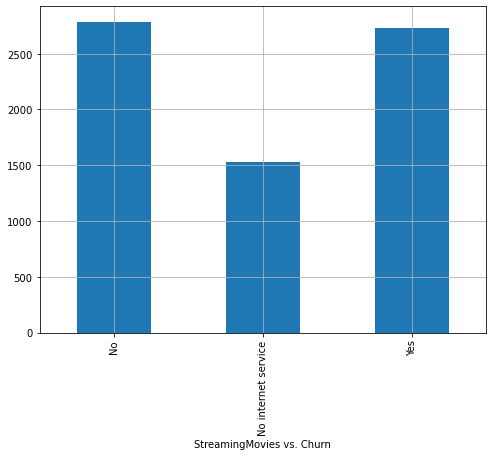

In [22]:
StreamingMovies_Churn=data.groupby(['StreamingMovies'])['Churn'].count().plot(kind='bar',xlabel='StreamingMovies vs. Churn', legend=None, grid=True,figsize=(8,6));

The two demographics that have proven to be the most popular with the telco brand are Fiber Optic and DSL. Hence, if the marketing team want to increase customer retention, they have to increase advertisement, targeting Fiber optic customers since they are more likely to churn.

# Services:

In [23]:
nan_data=data[data.isna().any(axis=1)]
nan_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [24]:
Service_data=data.dropna(how='all')
Service_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Churn                       No        Yes
StreamingMovies                          
No                   64.412859  67.445149
No internet service  21.136058  20.368142
Yes                  87.852638  89.933619


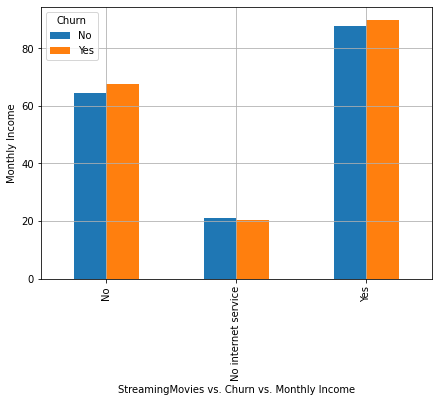

In [25]:
print(pd.crosstab(Service_data.StreamingMovies, Service_data.Churn, values=Service_data.MonthlyCharges, aggfunc='mean'))

pd.crosstab(Service_data.StreamingMovies, Service_data.Churn, values=Service_data.MonthlyCharges,aggfunc='mean').plot(kind='bar',ylabel='Monthly Income', xlabel='StreamingMovies vs. Churn vs. Monthly Income', grid=True, figsize=(7,5));

Churn                       No        Yes
StreamingTV                              
No                   64.547645  67.053503
No internet service  21.136058  20.368142
Yes                  87.979662  90.497359


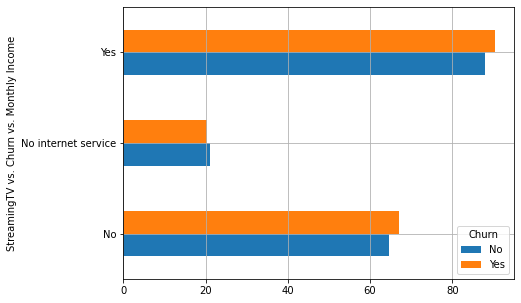

In [26]:
print(pd.crosstab(Service_data.StreamingTV, Service_data.Churn, values=Service_data.MonthlyCharges, aggfunc='mean'))

pd.crosstab(Service_data.StreamingTV, Service_data.Churn, values=Service_data.MonthlyCharges,aggfunc='mean').plot(kind='barh', ylabel='Monthly Income', xlabel='StreamingTV vs. Churn vs. Monthly Income', grid=True, figsize=(7,5));

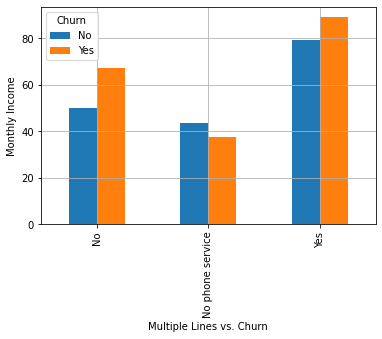

In [27]:
fig=Service_data.groupby(['MultipleLines', 'Churn'])['MonthlyCharges'].mean().unstack().plot(kind='bar', xlabel='Multiple Lines vs. Churn', ylabel="Monthly Income", grid=True)

In [30]:
Service_data.groupby('PhoneService')["Contract"].value_counts().

PhoneService  Contract      
No            Month-to-month     376
              Two year           161
              One year           145
Yes           Month-to-month    3499
              Two year          1534
              One year          1328
Name: Contract, dtype: int64

Contract      Month-to-month  One year  Two year   All
PhoneService                                          
No                       376       145       161   682
Yes                     3499      1328      1534  6361
All                     3875      1473      1695  7043


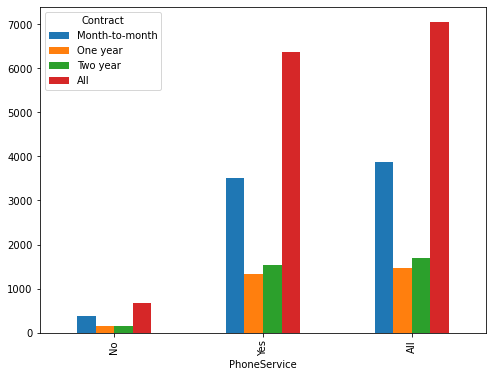

In [32]:
print(pd.crosstab(Service_data.PhoneService,Service_data.Contract, margins=True))
pd.crosstab(Service_data.PhoneService,Service_data.Contract,margins=True).plot(kind='bar',figsize=(8,6));

#If the customer chooses one year or two-year contract instead of month to month option, he or she is less likely to churn.